In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/bia.csv')
data.head(2)

/tmp/ipykernel_9818/3963953144.py:1: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/bia.csv')


,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_severity_of_illness,apr_risk_of_mortality,apr_medical_surgical,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs
0,New York City,Bronx,7000008.0,1172.0,Lincoln Medical & Mental Health Center,50 to 69,104,F,Other Race,Unknown,...,Extreme,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"487,295.01","311,442.42"
1,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,70 or Older,112,M,Black/African American,Unknown,...,Moderate,Moderate,Medical,Private Health Insurance,Medicare,NaN,NaN,Y,"12,299.22","8,878.39"


In [3]:
data['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

<Axes: xlabel='count', ylabel='gender'>

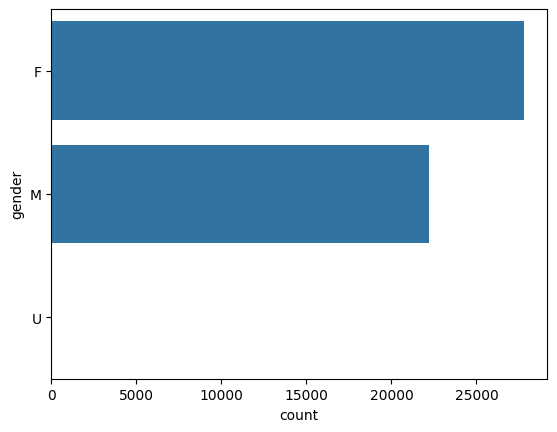

In [4]:
sns.countplot(data['gender'])

In [5]:
data['gender'] = data['gender'].map({"F": 0, "M": 1, "U": 2})
data['gender'].unique()

array([0, 1, 2])

In [6]:
data['emergency_department_indicator'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='count', ylabel='emergency_department_indicator'>

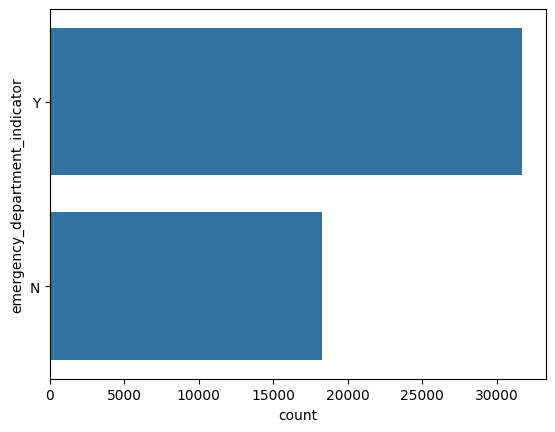

In [7]:
sns.countplot(data['emergency_department_indicator'])

In [8]:
data['emergency_department_indicator'] = data['emergency_department_indicator'].map({"Y": 1, "N": 0})
data['emergency_department_indicator'].unique()

array([1, 0])

<Axes: xlabel='count', ylabel='race'>

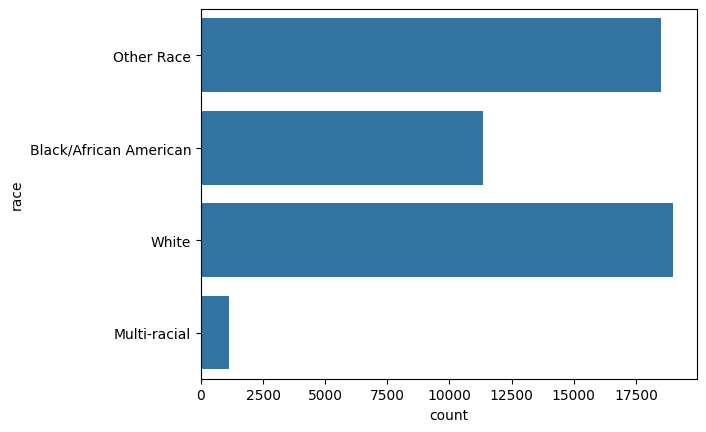

In [9]:
sns.countplot(data['race'])

In [10]:
data['race'].unique()

array(['Other Race', 'Black/African American', 'White', 'Multi-racial'],
      dtype=object)

In [11]:
race_data = pd.get_dummies(data['race']).astype('int')
data = pd.concat([data, race_data], axis=1)
data = data.drop(columns=['race'])
data.head(2)

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,ethnicity,length_of_stay,...,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs,Black/African American,Multi-racial,Other Race,White
0,New York City,Bronx,7000008.0,1172.0,Lincoln Medical & Mental Health Center,50 to 69,104,0,Unknown,45,...,Medicaid,NaN,NaN,1,"487,295.01","311,442.42",0,0,1,0
1,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,70 or Older,112,1,Unknown,1,...,Medicare,NaN,NaN,1,"12,299.22","8,878.39",1,0,0,0


In [12]:
data['age_group'].unique()

array(['50 to 69', '70 or Older', '30 to 49', '18 to 29', '0 to 17'],
      dtype=object)

<Axes: xlabel='count', ylabel='age_group'>

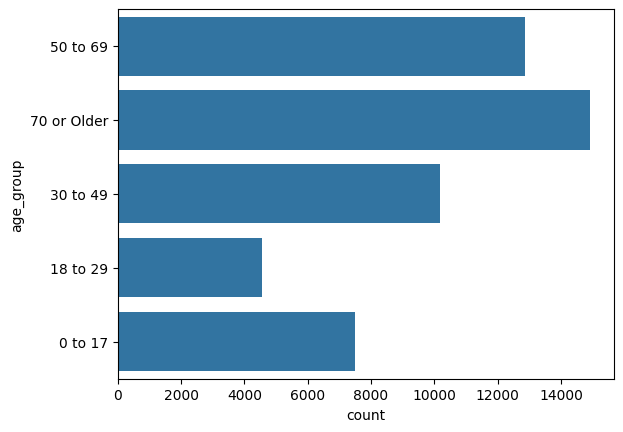

In [13]:
sns.countplot(data['age_group'])

In [14]:
age_grp_maps = {
    '0 to 17': 0,
    '18 to 29': 1,
    '30 to 49': 2,
    '50 to 69': 3,
    '70 or Older': 4
}

data['age_group'] = data['age_group'].map(age_grp_maps)

In [15]:
data['age_group'].unique()

array([3, 4, 2, 1, 0])

In [16]:
data.head()

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,ethnicity,length_of_stay,...,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs,Black/African American,Multi-racial,Other Race,White
0,New York City,Bronx,7000008.0,1172.0,Lincoln Medical & Mental Health Center,3,104,0,Unknown,45,...,Medicaid,NaN,NaN,1,"487,295.01","311,442.42",0,0,1,0
1,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,4,112,1,Unknown,1,...,Medicare,NaN,NaN,1,"12,299.22","8,878.39",1,0,0,0
2,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,2,112,1,Unknown,1,...,NaN,NaN,NaN,1,"15,160.38","10,943.76",0,0,1,0
3,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,2,112,0,Spanish/Hispanic,1,...,NaN,NaN,NaN,1,"22,786.29","16,448.65",0,0,0,1
4,New York City,Bronx,7000008.0,1172.0,Lincoln Medical & Mental Health Center,1,104,0,Spanish/Hispanic,5,...,NaN,NaN,NaN,0,"38,231.41","24,434.65",0,0,1,0


In [17]:
data.columns

Index(['hospital_service_area', 'hospital_county',
       'operating_certificate_number', 'permanent_facility_id',
       'facility_name', 'age_group', 'zip_code_3_digits', 'gender',
       'ethnicity', 'length_of_stay', 'type_of_admission',
       'patient_disposition', 'discharge_year', 'ccsr_diagnosis_code',
       'ccsr_diagnosis_description', 'ccsr_procedure_code',
       'ccsr_procedure_description', 'apr_drg_code', 'apr_drg_description',
       'apr_mdc_code', 'apr_mdc_description', 'apr_severity_of_illness_code',
       'apr_severity_of_illness', 'apr_risk_of_mortality',
       'apr_medical_surgical', 'payment_typology_1', 'payment_typology_2',
       'payment_typology_3', 'birth_weight', 'emergency_department_indicator',
       'total_charges', 'total_costs', 'Black/African American',
       'Multi-racial', 'Other Race', 'White'],
      dtype='object')

In [18]:
dropped_cols = ['hospital_county', 'operating_certificate_number', 'zip_code_3_digits', 'ethnicity']

data.drop(columns=dropped_cols, inplace=True)

In [19]:
data['type_of_admission'].unique()

array(['Emergency', 'Elective', 'Newborn', 'Urgent', 'Not Available',
       'Trauma'], dtype=object)

<Axes: xlabel='count', ylabel='type_of_admission'>

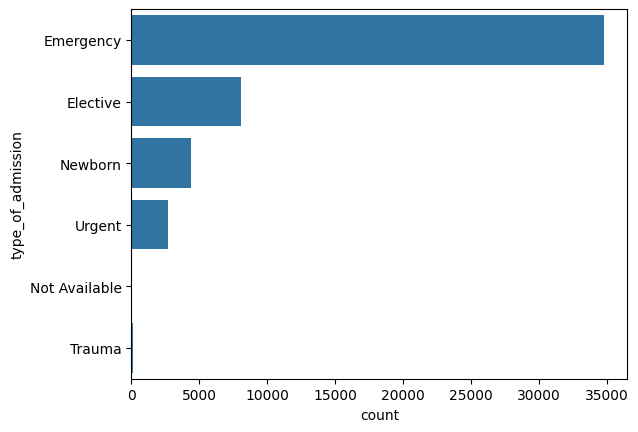

In [20]:
sns.countplot(data['type_of_admission'])


In [21]:
type_of_admission_data = pd.get_dummies(data['type_of_admission']).astype('int')
data = pd.concat([data, type_of_admission_data], axis=1)
data = data.drop(columns=['type_of_admission'])
data.head(2)

,hospital_service_area,permanent_facility_id,facility_name,age_group,gender,length_of_stay,patient_disposition,discharge_year,ccsr_diagnosis_code,ccsr_diagnosis_description,...,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Not Available,Trauma,Urgent
0,New York City,1172.0,Lincoln Medical & Mental Health Center,3,0,45,Skilled Nursing Home,2023,GEN004,Urinary tract infections,...,0,0,1,0,0,1,0,0,0,0
1,New York City,1301.0,Kings County Hospital Center,4,1,1,Left Against Medical Advice,2023,CIR017,Cardiac dysrhythmias,...,1,0,0,0,0,1,0,0,0,0


In [22]:
data['length_of_stay'].unique()

array(['45', '1', '5', '37', '2', '23', '7', '3', '8', '12', '25', '6',
       '39', '16', '26', '10', '14', '29', '15', '4', '19', '9', '49',
       '31', '58', '11', '42', '43', '32', '59', '17', '13', '28', '21',
       '48', '77', '18', '35', '40', '24', '38', '34', '20', '71', '27',
       '22', '30', '46', '47', '66', '55', '120 +', '36', '65', '50',
       '87', '51', '53', '89', '88', '91', '52', '92', '41', '95', '44',
       '33', '61', '75', '72', '105', '80', '74', '69', '85', '98', '54',
       '99', '84', '112', '64', '83', '56', '68', '62', '76', '118', '79',
       '63', '104', '93', '70', '107', '67', '57', '103', '73', '90',
       '86', '115', '60', '117', '78', '102', '82', '108', '100', '114',
       '111', '113', '94', '96', '109', '119', '106', '116', 2, 5, 3, 4,
       1, 6, 13, 18, 7, 31, 17, 22, 8, 14, 16, 9, 11, 19, 15, 12, 10, 72,
       34, 30, 35], dtype=object)

In [23]:
def clean_length_of_stay(x):
    x = str(x).strip('').split(' ')[0]
    return x

data['length_of_stay'] = data['length_of_stay'].apply(clean_length_of_stay).astype('int')
data['length_of_stay'].unique()

array([ 45,   1,   5,  37,   2,  23,   7,   3,   8,  12,  25,   6,  39,
        16,  26,  10,  14,  29,  15,   4,  19,   9,  49,  31,  58,  11,
        42,  43,  32,  59,  17,  13,  28,  21,  48,  77,  18,  35,  40,
        24,  38,  34,  20,  71,  27,  22,  30,  46,  47,  66,  55, 120,
        36,  65,  50,  87,  51,  53,  89,  88,  91,  52,  92,  41,  95,
        44,  33,  61,  75,  72, 105,  80,  74,  69,  85,  98,  54,  99,
        84, 112,  64,  83,  56,  68,  62,  76, 118,  79,  63, 104,  93,
        70, 107,  67,  57, 103,  73,  90,  86, 115,  60, 117,  78, 102,
        82, 108, 100, 114, 111, 113,  94,  96, 109, 119, 106, 116])

In [24]:
data['length_of_stay'] = data['length_of_stay'].astype('int')

<Axes: xlabel='length_of_stay_binned', ylabel='Count'>

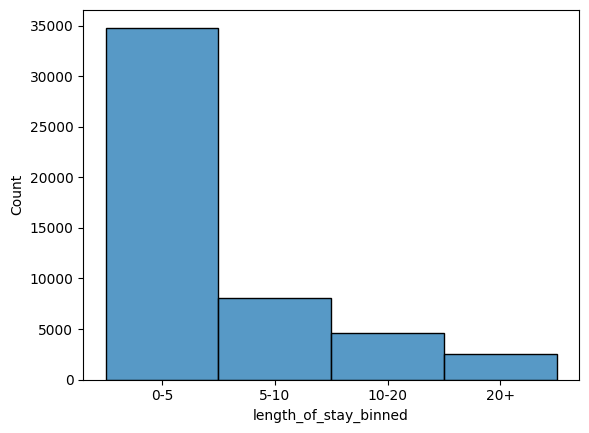

In [26]:
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '20+']

data['length_of_stay_binned'] = pd.cut(data['length_of_stay'], bins=bins, labels=labels, include_lowest=True)

sns.histplot(data['length_of_stay_binned'])